Importing required libraries

In [1]:
import nltk
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize
# import pygraphviz

Downloading the Project Gutenberg and Stopwords corpus provided by NLTK

In [2]:
nltk.download('stopwords')
nltk.download('all')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk

True

Extracting the raw text for Immortals of Mehula

In [4]:
from pathlib import Path

#file = Path.joinpath('Resources', 'test.txt')
file = Path.cwd() / "/Amish Tripathi - Immortals of Meluha.txt"
#file.read_text()

# Open the file in "read" mode ('r') 
with open(file, 'r') as text:
    textfile = text.read()
    print(textfile)

CHAPTER 1

He has come!


1900 BC, Mansarovar Lake(At the foot of Mount Kailash, Tibet)

Shiva gazed at the orange sky. The clouds hovering above Mansarovar had just parted to reveal the setting sun. The brilliant giver of life was calling it a day once again. Shiva had seen a few sunrises in his twenty-one years. But the sunset! He tried never to miss the sunset! On any other day, Shiva would have taken in the vista — the sun and the immense lake against the magnificent backdrop of the Himalayas stretching as far back as the eye could see. But not today.

He squatted and perched his lithe, muscular body on the narrow ledge extending over the lake. The numerous batde-scars on his skin gleamed in the shimmering reflected light of the waters. Shiva remembered well his carefree childhood days. He had perfected the art of throwing pebbles that bounced off the surface of the lake. He still held the record in his tribe for the highest number of bounces: seventeen.

On a normal day, Shiva wou

1A

List out the characters in the book


In [5]:
characters = ['Anandmayi','Arishtanemi','Ayurvati','Bhadra','Bhagirath','Bharat','Brahaspati','Brahma','Brahmanayak','Chenardhwaj','Chitraangadh',
              'Daksha','Dilipa','Drapaku','Jattaa','Jhooleshwar','Kanakhala','Krittika','Manu','Nandi','Panini','Paravateshwar','Ram','Rudra',
              'Sati','Satyadhwaj','Shiva','Tarak','The_hooded_Naga','Veerini','Vishwadyumna','Yakhya']

Preprocessing the spaces between the names of characters

In [7]:
sentences = sent_tokenize(textfile)
print(len(sentences))

7869


The number of chapters in the book = 135 + 1 (epilogue)
All the chapter titles are removed while preprocessing

In [8]:
count = 0
chapters = []
for sent in sentences:
    if ("CHAPTER" in sent and sent[0] == 'C') :
        sentences.remove(sent)
        count+=1

print(len(sentences))

7854


Once the text is preprocessed, it is converted into an adjacency matrix, stored as a pandas DataFrame

In [9]:
char_df = pd.DataFrame(0, index=characters, columns=characters)
char_df.head()

,Anandmayi,Arishtanemi,Ayurvati,Bhadra,Bhagirath,Bharat,Brahaspati,Brahma,Brahmanayak,Chenardhwaj,...,Ram,Rudra,Sati,Satyadhwaj,Shiva,Tarak,The_hooded_Naga,Veerini,Vishwadyumna,Yakhya
Anandmayi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arishtanemi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ayurvati,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bhadra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bhagirath,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


1B

Co-occurrence algorithm

In [10]:
for sentence in sentences:
    for char1 in characters:
        for char2 in characters:
            if (char1 != char2) and char1 in sentence and char2 in sentence:
                char_df[char1][char2] += 1
                char_df[char2][char1] += 1

char_df.head()

,Anandmayi,Arishtanemi,Ayurvati,Bhadra,Bhagirath,Bharat,Brahaspati,Brahma,Brahmanayak,Chenardhwaj,...,Ram,Rudra,Sati,Satyadhwaj,Shiva,Tarak,The_hooded_Naga,Veerini,Vishwadyumna,Yakhya
Anandmayi,0,0,2,0,0,0,0,0,0,0,...,4,0,2,0,28,0,0,0,0,0
Arishtanemi,0,0,0,0,0,0,2,0,0,0,...,0,0,2,0,8,0,0,2,0,0
Ayurvati,2,0,0,6,0,0,6,4,0,0,...,0,0,52,0,108,0,0,0,0,0
Bhadra,0,0,6,0,0,0,0,0,0,0,...,0,0,2,0,66,0,0,0,0,0
Bhagirath,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Creating a NetworkX graph from the adjacency matrix

In [52]:
G = nx.Graph()
G = nx.from_pandas_adjacency(char_df)
G1 = G

# for i in range(len(characters)):
#     for j in range(i+1, len(characters)):
#         char1 = characters[i]
#         char2 = characters[j]
#         if G.has_edge(char1, char2):
#             G[char1][char2]['interactions'] = char_df[char1][char2]

Printing nodes and edges in graph

In [12]:
print("Number of nodes in the graph:", len(G.nodes()))
print("Nodes:", G.nodes())
print()
print("Number of edges in the graph:", len(G.edges()))
print("Edges:", G.edges(data=True))

Number of nodes in the graph: 32
Nodes: ['Anandmayi', 'Arishtanemi', 'Ayurvati', 'Bhadra', 'Bhagirath', 'Bharat', 'Brahaspati', 'Brahma', 'Brahmanayak', 'Chenardhwaj', 'Chitraangadh', 'Daksha', 'Dilipa', 'Drapaku', 'Jattaa', 'Jhooleshwar', 'Kanakhala', 'Krittika', 'Manu', 'Nandi', 'Panini', 'Paravateshwar', 'Ram', 'Rudra', 'Sati', 'Satyadhwaj', 'Shiva', 'Tarak', 'The_hooded_Naga', 'Veerini', 'Vishwadyumna', 'Yakhya']

Number of edges in the graph: 101
Edges: [('Anandmayi', 'Ayurvati', {'weight': 2}), ('Anandmayi', 'Dilipa', {'weight': 2}), ('Anandmayi', 'Nandi', {'weight': 6}), ('Anandmayi', 'Ram', {'weight': 4}), ('Anandmayi', 'Sati', {'weight': 2}), ('Anandmayi', 'Shiva', {'weight': 28}), ('Arishtanemi', 'Brahaspati', {'weight': 2}), ('Arishtanemi', 'Kanakhala', {'weight': 2}), ('Arishtanemi', 'Nandi', {'weight': 12}), ('Arishtanemi', 'Sati', {'weight': 2}), ('Arishtanemi', 'Shiva', {'weight': 8}), ('Arishtanemi', 'Veerini', {'weight': 2}), ('Ayurvati', 'Bhadra', {'weight': 6}), ('Ay

Plotting the graph

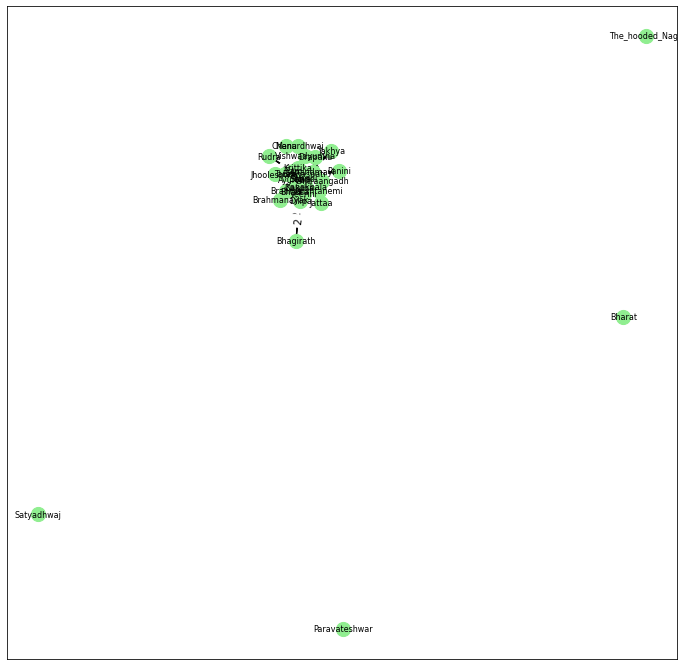

In [13]:
plt.figure(3, figsize=(12,12))
pos = nx.fruchterman_reingold_layout(G)

nx.draw_networkx(G, pos=pos, node_size = 200, font_size=8, node_color="lightgreen")
nx.draw_networkx_edges(G, pos=pos)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
plt.show()

Main Protagonists:

Bhadra
Sati
Shiva
Nandi

1C 

find degree, betweenness, closeness, PageRank of the main protagonists.


In [14]:
dc = nx.degree_centrality(G)

In [15]:
p_dc = dc['Bhadra'], dc['Shiva'], dc['Sati'], dc['Nandi']
p = ['Bhadra', 'Shiva', 'Sati', 'Nandi']
for i in range(4):
  print(p[i], p_dc[i])

Bhadra 0.12903225806451613
Shiva 0.8387096774193548
Sati 0.5806451612903225
Nandi 0.5483870967741935


In [16]:
bc = nx.betweenness_centrality(G)

In [17]:
p_bc = bc['Bhadra'], bc['Shiva'], bc['Sati'], bc['Nandi']
p = ['Bhadra', 'Shiva', 'Sati', 'Nandi']
for i in range(4):
  print(p[i], p_bc[i])

Bhadra 0.0005376344086021505
Shiva 0.3083589349718382
Sati 0.0787147977470558
Nandi 0.07308755760368664


In [18]:
cc = nx.closeness_centrality(G)

In [19]:
p_cc = cc['Bhadra'], cc['Shiva'], cc['Sati'], cc['Nandi']
p = ['Bhadra', 'Shiva', 'Sati', 'Nandi']
for i in range(4):
  print(p[i], p_cc[i])

Bhadra 0.46110056925996207
Shiva 0.8398617511520737
Sati 0.6532258064516129
Nandi 0.6355710549258936


In [20]:
pr = nx.pagerank(G, 0.85)

In [21]:
p_pr = pr['Bhadra'], pr['Shiva'], pr['Sati'], pr['Nandi']
p = ['Bhadra', 'Shiva', 'Sati', 'Nandi']
for i in range(4):
  print(p[i], p_pr[i])

Bhadra 0.018544935202962513
Shiva 0.28535956278690416
Sati 0.13596078713547546
Nandi 0.08598902417132737


1D

Global clustering coeff of graph.

In [22]:
gc = nx.average_clustering(G)

In [23]:
gc

0.693964097585421

Local clustering coeff of main protagonists.


In [24]:
lc = nx.clustering(G)

In [25]:
p_lc = lc['Bhadra'], lc['Shiva'], lc['Sati'], lc['Nandi']
p = ['Bhadra', 'Shiva', 'Sati', 'Nandi']
for i in range(4):
  print(p[i], p_lc[i])

Bhadra 0.8333333333333334
Shiva 0.2246153846153846
Sati 0.37254901960784315
Nandi 0.38235294117647056


1E

Community detection.

K-Cliqe:

In [26]:
cliques = list(nx.find_cliques(G))
bigger_cliques = [clique for clique in cliques if len(clique) > 3]
bigger_cliques

[['Shiva', 'Dilipa', 'Ayurvati', 'Kanakhala', 'Daksha'],
 ['Shiva', 'Dilipa', 'Ayurvati', 'Anandmayi'],
 ['Shiva', 'Chitraangadh', 'Ayurvati', 'Nandi'],
 ['Shiva', 'Chitraangadh', 'Ayurvati', 'Bhadra'],
 ['Shiva', 'Jhooleshwar', 'Brahaspati', 'Ram', 'Tarak'],
 ['Shiva', 'Jhooleshwar', 'Brahaspati', 'Ayurvati'],
 ['Shiva', 'Sati', 'Tarak', 'Ram', 'Brahaspati'],
 ['Shiva', 'Sati', 'Brahmanayak', 'Brahma', 'Daksha'],
 ['Shiva', 'Sati', 'Nandi', 'Brahma', 'Daksha', 'Ram'],
 ['Shiva', 'Sati', 'Nandi', 'Brahma', 'Daksha', 'Kanakhala', 'Ayurvati'],
 ['Shiva', 'Sati', 'Nandi', 'Anandmayi', 'Ram'],
 ['Shiva', 'Sati', 'Nandi', 'Anandmayi', 'Ayurvati'],
 ['Shiva', 'Sati', 'Nandi', 'Brahaspati', 'Ram', 'Daksha'],
 ['Shiva',
  'Sati',
  'Nandi',
  'Brahaspati',
  'Kanakhala',
  'Arishtanemi',
  'Veerini'],
 ['Shiva', 'Sati', 'Nandi', 'Brahaspati', 'Kanakhala', 'Daksha', 'Veerini'],
 ['Shiva', 'Sati', 'Nandi', 'Brahaspati', 'Kanakhala', 'Daksha', 'Ayurvati'],
 ['Shiva', 'Sati', 'Nandi', 'Brahaspati'

Louvain:


In [27]:
import networkx.algorithms.community as nx_comm

lc = nx_comm.louvain_communities(G, seed=123)

lc

[{'Bharat'},
 {'Brahma', 'Brahmanayak'},
 {'Paravateshwar'},
 {'Ayurvati', 'Jhooleshwar', 'Krittika', 'Manu', 'Sati', 'Tarak', 'Veerini'},
 {'Satyadhwaj'},
 {'Anandmayi',
  'Arishtanemi',
  'Bhadra',
  'Bhagirath',
  'Brahaspati',
  'Chenardhwaj',
  'Chitraangadh',
  'Daksha',
  'Dilipa',
  'Drapaku',
  'Jattaa',
  'Kanakhala',
  'Nandi',
  'Panini',
  'Ram',
  'Rudra',
  'Shiva',
  'Vishwadyumna',
  'Yakhya'},
 {'The_hooded_Naga'}]

Girwan Newman Algorithm:

In [35]:
import itertools
k = 4
G = nx.path_graph(characters)
comp = nx_comm.girvan_newman(G)
limited = itertools.takewhile(lambda c: len(c) <= k, comp)
for communities in limited:
    print(tuple(sorted(c) for c in communities))


(['Anandmayi', 'Arishtanemi', 'Ayurvati', 'Bhadra', 'Bhagirath', 'Bharat', 'Brahaspati', 'Brahma', 'Brahmanayak', 'Chenardhwaj', 'Chitraangadh', 'Daksha', 'Dilipa', 'Drapaku', 'Jattaa', 'Jhooleshwar'], ['Kanakhala', 'Krittika', 'Manu', 'Nandi', 'Panini', 'Paravateshwar', 'Ram', 'Rudra', 'Sati', 'Satyadhwaj', 'Shiva', 'Tarak', 'The_hooded_Naga', 'Veerini', 'Vishwadyumna', 'Yakhya'])
(['Anandmayi', 'Arishtanemi', 'Ayurvati', 'Bhadra', 'Bhagirath', 'Bharat', 'Brahaspati', 'Brahma'], ['Brahmanayak', 'Chenardhwaj', 'Chitraangadh', 'Daksha', 'Dilipa', 'Drapaku', 'Jattaa', 'Jhooleshwar'], ['Kanakhala', 'Krittika', 'Manu', 'Nandi', 'Panini', 'Paravateshwar', 'Ram', 'Rudra', 'Sati', 'Satyadhwaj', 'Shiva', 'Tarak', 'The_hooded_Naga', 'Veerini', 'Vishwadyumna', 'Yakhya'])
(['Anandmayi', 'Arishtanemi', 'Ayurvati', 'Bhadra', 'Bhagirath', 'Bharat', 'Brahaspati', 'Brahma'], ['Brahmanayak', 'Chenardhwaj', 'Chitraangadh', 'Daksha', 'Dilipa', 'Drapaku', 'Jattaa', 'Jhooleshwar'], ['Kanakhala', 'Krittika'

1F

Degree Distribution 

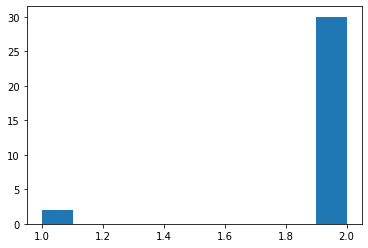

In [36]:
degrees = [G.degree(n) for n in G.nodes()]
plt.hist(degrees)
plt.show()


Average Shortest Path

In [37]:
print("Average shortest path length: ", nx.average_shortest_path_length(G))

Average shortest path length:  11.0


Size of largest component

In [38]:
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])
print(G0)

Graph with 32 nodes and 31 edges


G(n,p) and G(n,m) Graphs

In [39]:
n = G.number_of_nodes()
m = G.number_of_edges()
p = m / (n*(n-1)/2)
k = 2

In [40]:
G_gnp = nx.gnp_random_graph(n, p)
G_gnm = nx.gnm_random_graph(n, m)

print('Social Graph:', G.number_of_nodes(), 'nodes,', G.number_of_edges(), 'edges')
print('G(n,p) Graph:', G_gnp.number_of_nodes(), 'nodes,', G_gnp.number_of_edges(), 'edges')
print('G(n,m) Graph:', G_gnm.number_of_nodes(), 'nodes,', G_gnm.number_of_edges(), 'edges')

Social Graph: 32 nodes, 31 edges
G(n,p) Graph: 32 nodes, 33 edges
G(n,m) Graph: 32 nodes, 31 edges


Preferential Attachment

In [41]:
G_pa = nx.barabasi_albert_graph(n, k)

print('Social Graph:', G.number_of_nodes(), 'nodes,', G.number_of_edges(), 'edges')
print('Preferential Attachment Graph:', G_pa.number_of_nodes(), 'nodes,', G_pa.number_of_edges(), 'edges')

Social Graph: 32 nodes, 31 edges
Preferential Attachment Graph: 32 nodes, 60 edges


Small World Model

In [42]:
G_sw = nx.watts_strogatz_graph(n, k, p)


print('Social Graph:', G.number_of_nodes(), 'nodes,', G.number_of_edges(), 'edges')
print('Small World Graph:', G_sw.number_of_nodes(), 'nodes,', G_sw.number_of_edges(), 'edges')

Social Graph: 32 nodes, 31 edges
Small World Graph: 32 nodes, 32 edges


2A

The protagonists are Shiva, Sati, Bhadri, Nandi. These characters have high degree centrality values indicating that they are highly connected to the other characters in the story.

The pagerank and the betweeness centrality score suggests that Shiva is the main character in the story.
The rest of the protagonists also have relatively high pagerank scores compared to the other characters.

This shows that the protagonists we chose are closely related to the characters in the story.

2B

In the context of the book "The Immortals of Meluha", the clustering coefficient of 0.693964097585421 suggests that there is a high level of interconnectedness between the characters and events in the story.

There are 18 4-cliques in the graph may suggest that there are many groups of four characters in the story that are closely linked to one another.
This could indicate that there are many subplots or themes within the book that revolve around specific groups of characters or events. For example, each 4-clique could represent a group of characters that are closely tied together by a particular plotline or relationship.

an average shortest path length of 11 suggests that the characters in the story are relatively distant from one another in terms of their interactions and relationships.

This could indicate that the book features a large cast of characters that are not all directly connected to one another. It may also suggest that there are many subplots or storylines in the book that do not intersect with one another very frequently.

a high clustering coefficient would suggest that the nodes (i.e., characters or events) in the graph tend to cluster together more frequently than expected by chance, which would indicate a high degree of transitivity as well.

2C

A social graph with 31 edges suggests that the graph represents a social network where the nodes are individuals and the edges represent social connections or relationships between them.

A preferential attachment graph with 60 edges suggests a network where nodes that are already well-connected are more likely to attract new edges, leading to a power-law distribution of node degrees.

A G(n,p) graph with 33 edges suggests a random graph model where each possible edge exists with probability p, leading to a Poisson degree distribution.

A G(n,m) graph with 31 edges suggests a random graph model where m edges are added to the graph at random, leading to a binomial degree distribution.

Overall, the number of edges in a graph can provide insights into the connectivity and structure of the network. For example, a high number of edges may indicate a highly interconnected or dense network, while a low number of edges may suggest a more sparse or fragmented network. However, it is important to consider the specific characteristics of the graph and the context in which it was constructed to fully interpret the meaning of the edge count.